In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import odeint

# Heat transport in a saturated, hydrostatic soil

Andrew, Ines and Seth

Consider a control volume of soil, where

$$V=\Delta x\Delta y \Delta z$$

$$V=V_I+V_L+V_S+V_G$$

$$M=M_I+M_L+M_S+M_G$$

where $V$ is volume and $M$ is mass, and subscripts are for the different components, specifically liquid, $L$, ice, $I$, soil solid matter, $S$, and gas, $G$. The density of a component, $\rho_i$ is

$$\rho_i=\frac{M_i}{V_i}$$

### Volume fractions

Let $\theta_i$ represent the volume of a given component $i$ (where ice, liquid, etc, are the components) per volume, so

$$\theta_i=\frac{V_i}{V}$$


### Mass fractions

Let $m_i$ represent the mass of a given component, $i$, per volume. Then

$$m_i=\frac{M_i}{V}=\rho_i\theta_i$$

### Mass balance

We assume we are dealing with a closed system with respect to water - so there is no inflow or outflow. The continuity equation is:

$$\Delta M = 0$$

Therefore we have

$$\Delta(M_I+M_L+M_S+M_G)=0$$

We know that $M_S$ is constant, hence $\Delta M_S=0$. We assume that $M_G\approx0$, so $\Delta M_G=0$. Therefore

$$\Delta(M_I+M_L)=0$$

On a per unit volume basis we have

$$\Delta(m_I+m_L)=\Delta(\rho_I\theta_I+\rho_L\theta_L)=0$$

Since we are talking about changes in time, we can write

$$\frac{d}{dt}(\rho_I\theta_I+\rho_L\theta_L)=0$$

and since the densities are constant,

$$\rho_I\frac{d\theta_I}{dt}=-\rho_L\frac{d\theta_L}{dt}$$

and

$$\frac{d\theta_L}{dt}=-\frac{\rho_I}{\rho_L}\frac{d\theta_I}{dt}$$

This is the mass balance equation for the situation where the water doesn't move.




### Energy balance

Let $U$ (J) be the internal energy of the control volume, and $u$ (J/m$^3$) be the internal energy per unit volume. The change in internal energy is due to the exchange of energy (heat) with the surroundings. The incoming heat flux in the vertical direction is $H_{in}$ and the outgoing heat flux in the vertical direction is $H_{out}=H_{in}+\Delta H$, (both in J/m$^2$/s). Then

$$\Delta U =V\Delta u= -\Delta H\Delta x \Delta y \Delta t$$

and

$$\frac{\Delta u}{\Delta t} = \frac{\Delta H}{\Delta z}$$

or

$$\frac{\partial u}{\partial t}=-\frac{\partial H}{\partial z}$$

We now have to deal with the left hand side, that is the changes in internal energy, and the right hand side, that is the net addition, or removal, of heat. These can be treated separately. 

### Net exchange of heat

Since we are neglecting the movement of water, we can ignore advection and have heat transport only by diffusion. Diffusive transport is described by Fick's first law

$$H=-D\frac{dT}{dz}$$

And the right hand side of the continuity equation is simply Fick's second law, which is

$$\frac{\partial u}{\partial t}=D\frac{\partial^2 T}{\partial z^2}$$

### Changes in internal energy for a single component

The internal energy takes an arbitrary value - we are only interested in relative changes in energy. Changes in energy are due to sensible and latent heat. Internal energy associated with sensible heat, $U_{SEN}$ (J) or $u_{SEN}$ (J/m$^3$), is the energy stored in a material as a function of it's temperature, such that

$$\Delta U_{SEN,i}=\Delta (C_iM_iT_i)$$

or 

$$\Delta u_{SEN,i}=\Delta(C_im_iT_i)$$

or 

$$\Delta u_{SEN,i}=\Delta(C_i\theta_i\rho_i T_i)$$

where $C$ is the specific heat capacity (J/kg/K - i.e. the energy per mass per degree). Note that the specific heat can, in general, change due to a change in temperature, $T$, or due to a change in amount of a component, $m$, or both.

Internal energy associated with latent heat, $U_{LAT}$ (J) or $u_{LAT}$ (J/m$^3$), is the energy stored in a material as a function of the structure of the molecules, with solids having less internal energy than liquids and liquids having less internal energy than gases. Changes in internal energy associated with latent heat occur when a material changes phase, and is given by

$$\Delta U_{LAT}=\Delta(\lambda M)$$

or 

$$\Delta u_{LAT}=\Delta(\lambda m)$$

### Changes in interal energy in the soil control volume

Since the soil has four components, and three of these are dynamic, the change in internal energy can be written:

$$\Delta u=\Delta u_I+\Delta u_L+\Delta u_S+\Delta u_G$$

and further, the internal energy of a single component, $i$, is given by

$$\Delta u_i=\Delta u_{SEN,i}+\Delta u_{LAT,i}$$

meaning we end up with the following eight terms:

$$\begin{array}{ll}
\Delta u= & \Delta(C_Im_IT_I)+\Delta(C_Lm_LT_L)+\Delta(C_Sm_ST_S)+\Delta(C_Gm_GT_G)\\
 & +\Delta(\lambda_I m_I)+\Delta(\lambda_L m_L)+\Delta(\lambda_S m_S)+\Delta(\lambda_G m_G)
\end{array}$$

Now, since we have no phase change associated with the soil solids or the gas (in this case), we can ignore the last two terms. We can also make the important assumption that the components of our soil are all in thermal equilibrium, hence

$$T=T_I=T_L=T_S=T_G$$

So, considering changes with time we can write

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=&\displaystyle C_I\frac{d(m_IT)}{dt}+C_L\frac{d(m_LT)}{dt}+C_S\frac{d(m_ST)}{dt}+C_G\frac{d(m_GT)}{dt}\\
 &\displaystyle +  \lambda_I\frac{dm_I}{dt}+\lambda_L\frac{dm_L}{dt}
 \end{array}
$$

and

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=&\displaystyle \frac{dT}{dt}\left(C_Im_I+C_Lm_L+C_Sm_S+C_Gm_G\right)\\
 &\displaystyle + C_IT\frac{dm_I}{dt}+C_LT\frac{dm_L}{dt}+C_ST\frac{dm_S}{dt}+C_GT\frac{dm_G}{dt}\\
 &\displaystyle +  \lambda_I\frac{dm_I}{dt}+\lambda_L\frac{dm_L}{dt}
 \end{array}
$$

Since there is no change in mass of soil solids, and the change in air mass is negligible, we have

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=& \displaystyle \frac{dT}{dt}\left(C_Im_I+C_Lm_L+C_Sm_S+C_Gm_G\right)\\
 &\displaystyle + (C_IT+\lambda_I)\frac{dm_I}{dt}+(C_LT+\lambda_L)\frac{dm_L}{dt}
 \end{array}
$$

or

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=& \displaystyle \frac{dT}{dt}\left(C_I\theta_I\rho_I+C_L\theta_L\rho_L+C_S\theta_S\rho_S+C_G\theta_G\rho_G\right)\\
 &\displaystyle + (C_IT+\lambda_I)\rho_I\frac{d\theta_I}{dt}+(C_LT+\lambda_L)\rho_L\frac{d\theta_L}{dt}
 \end{array}
$$

(Note, do the last two terms above explain why the apparent latent heat capacity is a function of temperature? Maybe.)

At this point, if we examine the equation above, we are left with the question, how can we know how a certain amount of net energy exchange (i.e. from the diffusion equation above) is partitioned between changes in sensible and latent heat. I'm not sure that there is a completely rigorous solution beyond this point for the general case. However, we will now make a simplifying assumption - that is, assume that the soil is completely saturated.



### Changes in internal energy in a saturated soil

The change in internal energy for a saturated (with liquid or ice) soil is now given by

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=& \displaystyle \frac{dT}{dt}\left(C_I\theta_I\rho_I+C_L\theta_L\rho_L+C_S\theta_S\rho_S\right)\\
 &\displaystyle + (C_IT+\lambda_I)\rho_I\frac{d\theta_I}{dt}+(C_LT+\lambda_L)\rho_L\frac{d\theta_L}{dt}
 \end{array}
$$

Recall from the water balance equation we have 

$$\frac{d\theta_I}{dt}=-\frac{\rho_L}{\rho_I}\frac{d\theta_L}{dt}$$

so

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=& \displaystyle \frac{dT}{dt}\left(C_I\theta_I\rho_I+C_L\theta_L\rho_L+C_S\theta_S\rho_S\right)\\
 &\displaystyle - (C_IT+\lambda_I)\rho_L\frac{d\theta_L}{dt}+(C_LT+\lambda_L)\rho_L\frac{d\theta_L}{dt}
 \end{array}
$$

and

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=& \displaystyle \frac{dT}{dt}\left(C_I\theta_I\rho_I+C_L\theta_L\rho_L+C_S\theta_S\rho_S\right)\\
 &\displaystyle \frac{d\theta_L}{dt}\left(T\rho_L(C_L-C_I)+\rho_L(\lambda_L-\lambda_I)\right)
 \end{array}
$$

Now, we also know that due to freezing point depression, we have a relationship between the liquid water content, $\theta_L$ and the temperature. Lets assume that this is

$$\theta_L=f(T)$$

Hence

$$\frac{d\theta_L}{dT}=f'(T)$$

where $f(T)$ and $f'(T)$ are parametric expressions. Now we can write

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=& \displaystyle \frac{dT}{dt}\left(C_I\theta_I\rho_I+C_L\theta_L\rho_L+C_S\theta_S\rho_S\right)\\
 &\displaystyle \frac{dT}{dt}f'(T)\left(T\rho_L(C_L-C_I)+\rho_L(\lambda_L-\lambda_I)\right)
 \end{array}
$$

Or in otherwords:

$$\begin{array}{ll}
\displaystyle
\frac{du}{dt}=& \displaystyle \frac{dT}{dt}\left(C_I\theta_I\rho_I+C_L\theta_L\rho_L+C_S\theta_S\rho_S + f'(T)\left(T\rho_L(C_L-C_I)+\rho_L(\lambda_L-\lambda_I)\right)\right)
 \end{array}
$$

### Governing equation for heat transport in a saturated frozen soil with no movement of water

$$\frac{\partial T}{\partial t}\left(C_I\theta_I\rho_I+C_L\theta_L\rho_L+C_S\theta_S\rho_S + f'(T)\left(T\rho_L(C_L-C_I)+\rho_L(\lambda_L-\lambda_I)\right)\right)=D\frac{\partial^2 T}{\partial z^2}$$

Note, for $T$ values not close to zero degrees celcius, $f'(T)$ is zero, and hence there are no latent heat effects. 

Also note, we have not here defined how $D$ is also a function of the different components, which is important, but simple to define.

# The VG equations

van Genuchten:

$$\frac{\theta-\theta_R}{\theta_S-\theta_R}=S_e=(1+(\alpha\psi)^n)^{-m}$$

$$\theta=\theta_R+(\theta_S-\theta_R)(1+(\alpha\psi)^n)^{-m}$$

It can be shown (ask me for my derivation) that the slope of this is given by

$$\frac{d\theta}{d\psi}=\frac{-(\theta_S-\theta_R)m\alpha}{1-m}S_e^{1/m}(1-S_e^{1/m})^m$$

### The GCE Equation

Start from this

$$dG_I=-S_IdT+\nu_IdP_I=dG_L=-S_LdT+\nu_LdP_L$$

where $S$ is the entropy per mass, and $\nu$ is the specific volume, which is $1/\rho$. Assume $dP_I=0$ and $S_L-S_I=L_f/T$, then

$$\frac{L_f}{T}dT=\nu_LdP_L$$

Therefore

$$P-P_0=\frac{L_f}{T_0\nu}(T-T_0)$$

and

$$\psi=\frac{L_f}{gT_0}T$$

where $T$ is in degrees C, and $T_0$ is 273.15 K.

### The SFC and CFC curves

Substituting the above into the van Genuchten model we get the SFC

$$S_e=\left(1+\left(\alpha\frac{L_f}{gT_0}T\right)^n\right)^{-m}$$

$$\theta_L=\theta_R+(\theta_S-\theta_R)S_e$$

and the CFC (which is the slope of the SFC)

$$\frac{d\theta_L}{dT}=\frac{-(\theta_S-\theta_R)m\alpha\frac{L_f}{gT_0}}{1-m}S_e^{1/m}(1-S_e^{1/m})^m$$

Which is

$$\frac{d\theta_L}{dT}=\frac{d\theta_L}{d\psi}\frac{L_f}{gT_0}$$


In [2]:
def thetaFun(psi,pars):
    psi_dummy=psi.copy()
    psi_dummy[psi_dummy>0]=0.
    Se=(1+(pars['alpha']*psi_dummy)**pars['n'])**(-pars['m'])
    return Se*(pars['thetaS']-pars['thetaR'])+pars['thetaR']

def CFun(psi,pars):
    psi_dummy=psi.copy()
    psi_dummy[psi_dummy>0]=0.
    m=pars['m']
    Se=(1+(pars['alpha']*psi_dummy)**pars['n'])**(-m)
    C=-pars['alpha']*m/(1-m)*(pars['thetaS']-pars['thetaR'])*Se**(1/m)*(1-Se**(1/m))**m
    C[psi_dummy>=0]=0.
    return C

def GCE(T,pars):
    psi=pars['Lf']/pars['g']/pars['T0']*T
    psi[psi>0]=0.
    return psi

def SFC(T,pars):
    psi=GCE(T,pars)
    theta=thetaFun(psi,pars)
    return theta 

def CFC(T,pars):
    psi=GCE(T,pars)
    C=CFun(psi,pars)*pars['Lf']/pars['g']/pars['T0']
    return C

In [3]:
def BulkHeatCapacityfun(T,pars):
    thL=SFC(T,pars)
    thI=pars['thetaS']-thL
    thS=1-pars['thetaS']
    BHC=pars['CI']*thI*pars['rhoI']
    BHC+=pars['CL']*thL*pars['rhoL']
    BHC+=pars['CS']*thS*pars['rhoS']
    fdash=CFC(T,pars)
    A=(pars['T0']+T)*pars['rhoL']*(pars['CL']-pars['CI'])
    B=pars['rhoL']*pars['Lf']
    BHC+=fdash*(A+B)
    BHC=BHC
    return BHC

In [4]:
def BulkThermalConductivityfun(T,pars):
    thL=SFC(T,pars)
    thI=pars['thetaS']-thL
    thS=1-pars['thetaS']
    X=thL*pars['lamL']**pars['a']
    X+=thI*pars['lamI']**pars['a']
    X+=thS*pars['lamS']**pars['a']
    lam=X**(1/pars['a'])
    return lam

In [5]:
def ODEfun(T,t,tB,TB,Hsurf,dz,pars,nz):

    lam=BulkThermalConductivityfun(T,pars)
    BHC=BulkHeatCapacityfun(T,pars)
    
    # Heat fluxes:
    H=np.zeros(nz+1)
    H[1:-1]=-(lam[1:]+lam[:-1])/2*(T[1:]-T[:-1])/(dz)
    # Upper boundary:
    if Hsurf==[]:
        TB=np.interp(t,tB,TB)
        H[0]=-lam[0]*(T[0]-TB)/(dz/2.)
    else:
        H[0]=Hsurf*86400.
    # Lower boundary:
    H[-1]=0.
    
    dTdt=-(H[1:]-H[:-1])/dz/BHC
    return dTdt

In [6]:
pars={}
# Soil hydraulic parameters:
pars['thetaR']=0.1        # -
pars['thetaS']=0.4        # -
pars['alpha']=-0.2        # 1/m
pars['n']=1.8             # -
pars['m']=1-1/pars['n']   # - 
pars['Ks']=0.01           # m/d
pars['neta']=0.5          # -

# Basic thermal parameters
#   Latent heat of fusion
pars['Lf']=334000         # J/kg
#   Specific heat capacities
pars['CL']=4200           # J/kg/K
pars['CI']=2100           # J/kg/K
pars['CS']=700            # J/kg/K         
pars['CA']=1000           # J/kg/K
#   Thermal conductivities
pars['lamL']=0.56*86400   # J/d/m/K
pars['lamI']=2.2*86400    # J/d/m/K
pars['lamS']=2.9*86400    # J/d/m/K
pars['lamA']=0.024*86400  # J/d/m/K
pars['a']=-0.5            # exponent in the thermal conductivity model (between -1 and 1 and not 0)

pars['T0']=273.15         # K
pars['rhoL']=1000.        # kg/m3
pars['rhoI']=1000.   #918 # kg/m3
pars['rhoS']=1500.        # kg/m3
pars['g']=9.81            # m/s2


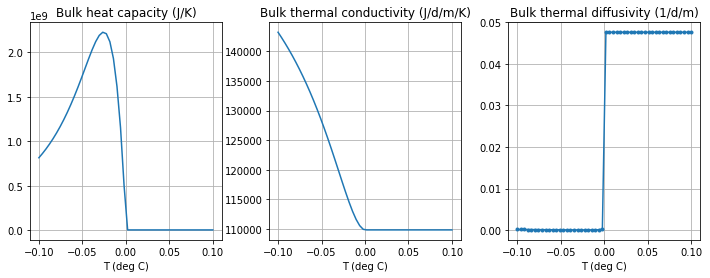

In [7]:
# Test functions:
T=np.linspace(-0.1,0.1)
BHC=BulkHeatCapacityfun(T,pars)
Blam=BulkThermalConductivityfun(T,pars)
pl.figure(figsize=(12,4))
pl.subplot(1,3,1)
pl.plot(T,BHC)
pl.title('Bulk heat capacity (J/K)')
pl.grid()
pl.xlabel('T (deg C)')
pl.subplot(1,3,2)
pl.plot(T,Blam)
pl.title('Bulk thermal conductivity (J/d/m/K)')
pl.grid()
pl.xlabel('T (deg C)')
pl.subplot(1,3,3)
pl.plot(T,Blam/BHC,'.-')
pl.grid()
pl.title('Bulk thermal diffusivity (1/d/m)')
pl.xlabel('T (deg C)')
pl.subplots_adjust(wspace=0.25)
pl.show()

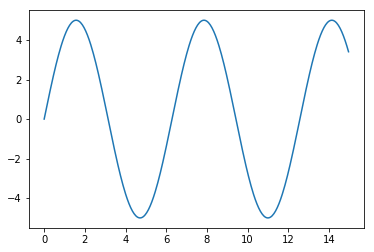

In [8]:
# Grid, ICs and BCs
dz=0.01
zMax=0.5
z=np.arange(dz/2,zMax,dz)
nz=len(z)

t=np.arange(0,15,1/24.) # days
nt=len(t)

T0=np.zeros(nz)
# T0[z<0.1]=10.

# Surface temperature:
TB=np.sin(t)*5
# TB=np.zeros(nt)+1.
Hsurf=[]
# Hsurf=40.    # W/m2

pl.plot(t,TB)

In [9]:
Tw=odeint(ODEfun,np.zeros(nz)+1.0,t,args=(t,TB,Hsurf,dz,pars,nz),mu=1,ml=1,mxstep=10000,hmax=0.001)
T=odeint(ODEfun,T0-1.,t,args=(t,TB,Hsurf,dz,pars,nz),mu=1,ml=1,mxstep=10000,hmax=0.001)
# Thot=odeint(ODEfun,T0+10,t,args=(t,TB+10,Hsurf,dz,pars,nz),mu=1,ml=1,mxstep=10000,hmax=0.001)

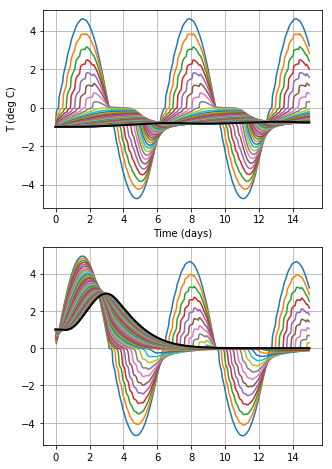

In [10]:
pl.figure(figsize=(5,8))
pl.subplot(2,1,1)

pl.plot(t,T) #[:,np.arange(1,nz,10)])
# pl.plot(t,Tw) #[:,np.arange(1,nz,10)])
# pl.plot(t,Thot) #[:,np.arange(1,nz,10)])
# pl.plot(t,T[:,0],'-k',linewidth=2)
# pl.plot(t,T[:,10],'-k',linewidth=2)
pl.plot(t,T[:,-1],'-k',linewidth=2)
pl.xlabel('Time (days)')
pl.ylabel('T (deg C)')
# pl.ylim(-0.5,0.01)
# pl.xlim(3.5,7)
pl.grid()
pl.subplot(2,1,2)
pl.plot(t,Tw)
pl.plot(t,Tw[:,-1],'-k',linewidth=2)
# pl.xlim(0,0.1)
pl.grid()
pl.show()

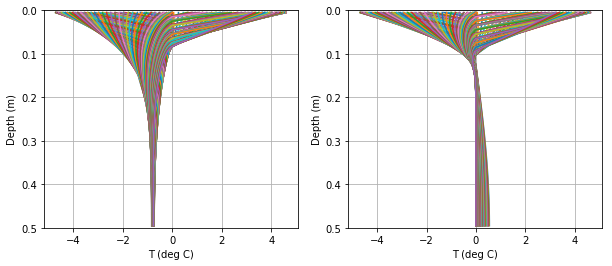

In [11]:
pl.figure(figsize=(10,4))
pl.subplot(1,2,1)
pl.plot(T[t>6,:].T,z)
# pl.plot(T.T[:,120],z,'-k',linewidth=2)
pl.ylim(0.5,0)
pl.ylabel('Depth (m)')
pl.xlabel('T (deg C)')
pl.grid()
pl.subplot(1,2,2)
pl.plot(Tw[t>6,:].T,z)
# pl.plot(Tw.T[:,120],z,'-k',linewidth=2)
pl.ylim(0.5,0)
pl.ylabel('Depth (m)')
pl.xlabel('T (deg C)')
pl.grid()

pl.show()

TypeError: Illegal arguments to pcolor; see help(pcolor)

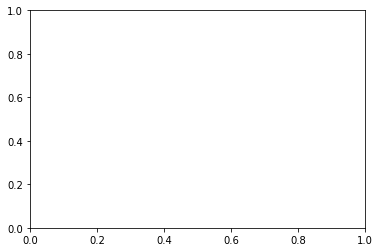

In [12]:
pl.pcolor(T.T,z)
pl.ylim(10,0)

In [ ]:
thL=SFC(T,pars)
thI=pars['thetaS']-thL
StorageL=dz*np.sum(thL,1)*1000
StorageI=dz*np.sum(thI,1)*1000
pl.plot(t,StorageL,'b',label='Liquid water')
pl.plot(t,StorageI,'k',label='Ice')
pl.legend()
pl.ylabel('Storage (mm)')
pl.xlabel('Time (days)')
pl.title('Total storage in the profile')
pl.grid()
pl.show()

In [ ]:
CFC(np.array([-2]),pars)

In [ ]:
pars

In [ ]:
T=np.linspace(-1,1,100)
Tmid=(T[:-1]+T[1:])/2.
thL=SFC(T,pars)
d1=np.diff(thL)/np.diff(T)
d2=CFC(Tmid,pars)

pl.plot(Tmid,d1,'.')
pl.plot(Tmid,d2)

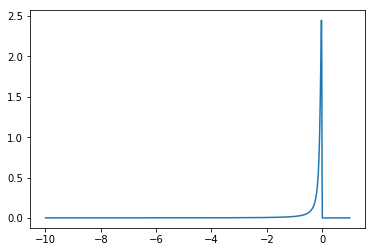

In [24]:
T=np.linspace(-10,1,1000)
LW=CFC(T,pars)
pl.plot(T,LW)


In [ ]:

Tw=odeint(ODEfun,np.zeros(nz)+1.0,t,args=(t,TB,Hsurf,dz,pars,nz),mu=1,ml=1,mxstep=10000,hmax=0.001)